In [182]:
print("HelloWorld!")

HelloWorld!


In [183]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [184]:
import os
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from mlxtend.data     import loadlocal_mnist

from sklearn.linear_model import SGDClassifier
from sklearn.svm          import SVC
from sklearn.neighbors    import KNeighborsClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import precision_score, recall_score, f1_score
from sklearn.metrics         import precision_recall_fscore_support
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
print("test success")

test success


In [185]:
print(pd.show_versions())


INSTALLED VERSIONS
------------------
commit           : 4bfe3d07b4858144c219b9346329027024102ab6
python           : 3.9.12.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 166 Stepping 0, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : Korean_Korea.949

pandas           : 1.4.2
numpy            : 1.21.5
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 61.2.0
Cython           : 0.29.28
pytest           : 7.1.1
hypothesis       : None
sphinx           : 4.4.0
blosc            : None
feather          : None
xlsxwriter       : 3.0.3
lxml.etree       : 4.8.0
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 8.2.0
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : 1.3.4
brotli  

In [186]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
# PROJECT_ROOT_DIR = "C:\\Users\\mycom0703\\Desktop\\Young\\20.github_shared\\01.python\\AI\handsOnMachineLearning-from_JaeHoonKim-\\ArtificialInteligenceAndPractice(from.JaeHoonKim)(using Hands_on_MachineLearning\\04week)"
DATA_PATH = PROJECT_ROOT_DIR + "/datasets/"



In [187]:
def load_data(path=DATA_PATH):
    print("======================dataLoad시작==========================")

    train = pd.read_csv(DATA_PATH + 'train.csv')
    test = pd.read_csv(DATA_PATH + 'test.csv')

    print("----------------trainDataSet----------------------")
#     print(train)
    display(train)
#     train.sample(5)
    print("----------------testDataSet----------------------")
    display(test)
#     print(test)
    print("======================dataLoad종료==========================")
    return train, test;

In [188]:
def delete_data(data):
    print("======================deleteData시작==========================")
    data.pop('PassengerId')
    print('PassengerId 제거')
    data.pop('Cabin')
    print('Cabin 제거')
    data.pop('Name')
    print('Name 제거')
    data.pop('Ticket')
    print('Ticket 제거')
#     print(data)
    display(data)
    print("======================deleteLoad종료==========================")


In [189]:
def checkNan(dataset, column):
    embarkedTrainData = pd.DataFrame(train, columns=[column])
    check_nan = embarkedTrainData[column].isnull().values.any()

    if check_nan==True:
        print(f"{column}칼럼에 Nan이 있습니다.")
    else:
        print(f"{column}칼럼에 Nan이 없습니다.")
    print('----------')

<h2>main문</h2>
<h3>데이터 로드</h3>

In [190]:
if __name__ == '__main__':
    train, test = load_data(DATA_PATH)


======================dataLoad시작==========================
----------------trainDataSet----------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


----------------testDataSet----------------------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


======================dataLoad종료==========================


<h3>Q1.아래의 자질들은 생존여부를 결정하는 데 큰 도움이 되지 않아서 제거한다.</h3>
<p>
    <ul>
        <li>PassengerId</li>
        <li>Cabin: 값이 없는 경우가 너무 많음</li>
        <li>Name: </li>
        <li>Ticket: </li>
    </ul>
</p>

In [191]:
    delete_data(train)
#     train.sample(5)
    delete_data(test)
#     test.sample(5)

======================deleteData시작==========================
PassengerId 제거
Cabin 제거
Name 제거
Ticket 제거


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


======================deleteLoad종료==========================
======================deleteData시작==========================
PassengerId 제거
Cabin 제거
Name 제거
Ticket 제거


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


======================deleteLoad종료==========================


<h3>Q2.Embarked 자질의 값이 없을 경우(NaN), 가장 빈도수가 높은 값인 ‘S’로 대체한다</h3>

<h5>Embarekd변경전</h5>

In [192]:
    checkNan(train, 'Embarked')

Embarked칼럼에 Nan이 있습니다.
----------


In [193]:
    ##########################################
    train[['Embarked']] = train[['Embarked']].fillna('S')
    test[['Embarked']] = test[['Embarked']].fillna('S')
    ##########################################

<h5>Embarked변경후</h5>

In [194]:
    checkNan(train, 'Embarked')
    checkNan(test, 'Embarked')

Embarked칼럼에 Nan이 없습니다.
----------
Embarked칼럼에 Nan이 없습니다.
----------


<h3>Q3.Age 자질의 값이 없을 경우(NaN), median(중간값)으로 대체한다.</h3>

In [195]:
    checkNan(test, 'Age')

Age칼럼에 Nan이 있습니다.
----------


In [196]:
    median = train.Age.median()
    print(median)
    train[['Age']] = train[['Age']].fillna(median)
    
    median = test.Age.median()
    print(median)
    test[['Age']] = test[['Age']].fillna(median)

28.0
27.0


In [197]:
    checkNan(test, 'Age')

Age칼럼에 Nan이 없습니다.
----------


<h3>Q4. Fare 자질의 값이 없을 경우(NaN), mean(평균)으로 대체한다.</h3>

In [198]:
    checkNan(train, 'Fare')

Fare칼럼에 Nan이 없습니다.
----------


In [199]:
    mean = train.Fare.mean()
    train[['Fare']] = train[['Fare']].fillna(mean)
    print(mean)
    
    mean = test.Fare.mean()
    test[['Fare']] = test[['Fare']].fillna(mean)
    print(mean)

32.2042079685746
35.6271884892086


In [200]:
    checkNan(train, 'Fare')

Fare칼럼에 Nan이 없습니다.
----------


<h3>Q5. SibSp + Parch > 0일 경우에는 혼자서 여행 중이다. 따라서 IsAlone 자질을 추가한다.</h3>
<p>
    <ul>
        <li>0: Alone </li>
        <li>1: No Aline</li>
    </ul>
</p>

In [201]:
    def addIsAlone(dataset):
        dataset['IsAlone'] = dataset['SibSp'] + dataset['Parch']
        dataset['IsAlone'] = dataset['SibSp'] + dataset['Parch']
        display(dataset)
        dataset['IsAlone'] = dataset['IsAlone'].apply(lambda x: 1 if x==0 else 0)
        display(dataset)
        

In [202]:
    addIsAlone(train)
    addIsAlone(test)
#     if train['IsAlone'] == 0:
#         train.replace({'IsAlone':0}, 1)
#     else:
#         train.replace({''})

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0
887,1,1,female,19.0,0,0,30.0000,S,0
888,0,3,female,28.0,1,2,23.4500,S,3
889,1,1,male,26.0,0,0,30.0000,C,0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1
887,1,1,female,19.0,0,0,30.0000,S,1
888,0,3,female,28.0,1,2,23.4500,S,0
889,1,1,male,26.0,0,0,30.0000,C,1


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,1
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,2
...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S,0
414,1,female,39.0,0,0,108.9000,C,0
415,3,male,38.5,0,0,7.2500,S,0
416,3,male,27.0,0,0,8.0500,S,0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,3,male,34.5,0,0,7.8292,Q,1
1,3,female,47.0,1,0,7.0000,S,0
2,2,male,62.0,0,0,9.6875,Q,1
3,3,male,27.0,0,0,8.6625,S,1
4,3,female,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S,1
414,1,female,39.0,0,0,108.9000,C,1
415,3,male,38.5,0,0,7.2500,S,1
416,3,male,27.0,0,0,8.0500,S,1


<h3>Q6. Sex의 값이 문자열이므로 숫자(female:0, male: 1)로 변경한다.</h3>

In [203]:
    def changeSextoInt(dataset):
        print('-----------------변경전------------------')
        display(dataset)
        print('-----------------------------------------')
        dataset['Sex'] = dataset['Sex'].apply(lambda x: 0 if x=='female' else 1)
        print('-----------------변경후------------------')
        display(dataset)
        print('-----------------------------------------')

In [204]:
    changeSextoInt(train)
    changeSextoInt(test)

-----------------변경전------------------


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1
887,1,1,female,19.0,0,0,30.0000,S,1
888,0,3,female,28.0,1,2,23.4500,S,0
889,1,1,male,26.0,0,0,30.0000,C,1


-----------------------------------------
-----------------변경후------------------


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,0,3,1,22.0,1,0,7.2500,S,0
1,1,1,0,38.0,1,0,71.2833,C,0
2,1,3,0,26.0,0,0,7.9250,S,1
3,1,1,0,35.0,1,0,53.1000,S,0
4,0,3,1,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,1
887,1,1,0,19.0,0,0,30.0000,S,1
888,0,3,0,28.0,1,2,23.4500,S,0
889,1,1,1,26.0,0,0,30.0000,C,1


-----------------------------------------
-----------------변경전------------------


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,3,male,34.5,0,0,7.8292,Q,1
1,3,female,47.0,1,0,7.0000,S,0
2,2,male,62.0,0,0,9.6875,Q,1
3,3,male,27.0,0,0,8.6625,S,1
4,3,female,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S,1
414,1,female,39.0,0,0,108.9000,C,1
415,3,male,38.5,0,0,7.2500,S,1
416,3,male,27.0,0,0,8.0500,S,1


-----------------------------------------
-----------------변경후------------------


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,3,1,34.5,0,0,7.8292,Q,1
1,3,0,47.0,1,0,7.0000,S,0
2,2,1,62.0,0,0,9.6875,Q,1
3,3,1,27.0,0,0,8.6625,S,1
4,3,0,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,S,1
414,1,0,39.0,0,0,108.9000,C,1
415,3,1,38.5,0,0,7.2500,S,1
416,3,1,27.0,0,0,8.0500,S,1


-----------------------------------------


<h3>Q7.Embarked의 값이 문자열이므로 숫자(C:0, Q:1, S:2)로 변경한다.</h3>

In [1]:
    def get_category(x):
        tmp = 0
        if x == 'C':
            tmp = 0
            return tmp
        elif x == 'Q':
            tmp = 1
            return tmp
        else:
            tmp = 2
            return tmp
        
    def changeEmbarkedtoInt(dataset):
        print('-----------------변경전------------------')
        display(dataset)
        print('-----------------------------------------')
#         dataset['Embarked'] = dataset['Embarked'].apply(lambda x: 0 if x == 'C' else ( 1 if x=='Q' else 2 ) )
        dataset['Embarked'] = dataset['Embarked'].apply(get_category)
#         dataset.loc[dataset['Embarked'] == 'C', 'Embarked'] == 0
#         dataset.loc[dataset['Embarked'] == 'Q', 'Embarked'] == 1
#         dataset.loc[dataset['Embarked'] == 'S', 'Embarked'] == 2
#         dataset = dataset.replace('C', 0)
#         dataset = dataset.replace('Q', 1)
#         dataset = dataset.replace('S', 2)
        print('-----------------변경후------------------')
        display(dataset)
        print('-----------------------------------------')

In [206]:
    changeEmbarkedtoInt(train)
    changeEmbarkedtoInt(test)

-----------------변경전------------------


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,0,3,1,22.0,1,0,7.2500,S,0
1,1,1,0,38.0,1,0,71.2833,C,0
2,1,3,0,26.0,0,0,7.9250,S,1
3,1,1,0,35.0,1,0,53.1000,S,0
4,0,3,1,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,1
887,1,1,0,19.0,0,0,30.0000,S,1
888,0,3,0,28.0,1,2,23.4500,S,0
889,1,1,1,26.0,0,0,30.0000,C,1


-----------------------------------------
-----------------변경후------------------


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1
887,1,1,0,19.0,0,0,30.0000,2,1
888,0,3,0,28.0,1,2,23.4500,2,0
889,1,1,1,26.0,0,0,30.0000,0,1


-----------------------------------------
-----------------변경전------------------


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,3,1,34.5,0,0,7.8292,Q,1
1,3,0,47.0,1,0,7.0000,S,0
2,2,1,62.0,0,0,9.6875,Q,1
3,3,1,27.0,0,0,8.6625,S,1
4,3,0,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,S,1
414,1,0,39.0,0,0,108.9000,C,1
415,3,1,38.5,0,0,7.2500,S,1
416,3,1,27.0,0,0,8.0500,S,1


-----------------------------------------
-----------------변경후------------------


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,3,1,34.5,0,0,7.8292,1,1
1,3,0,47.0,1,0,7.0000,2,0
2,2,1,62.0,0,0,9.6875,1,1
3,3,1,27.0,0,0,8.6625,2,1
4,3,0,22.0,1,1,12.2875,2,0
...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2,1
414,1,0,39.0,0,0,108.9000,0,1
415,3,1,38.5,0,0,7.2500,2,1
416,3,1,27.0,0,0,8.0500,2,1


-----------------------------------------


<h3>Q8.아래의 프로그램을 이용해서 학습이 반복될 때 정확률의 변화를 구한다.</h3>
    <code>sgd_clf=SGDClassifier(max_iter=1, 
	tol=-np.infty, 
	warm_start=True,                       
	penalty=None, 
	learning_rate="constant", 
	eta0=0.0005, random_state=42)
    </code>
    <p></p>
    <code>
train_accuracy, val_accuracy = [], []
for epoch in range(500):
    sgd_clf.fit(X_train, y_train) # X_train, y_train는 준비되었다고 가정함. 
    y_train_predict = sgd_clf.predict(X_train)
    y_val_predict = sgd_clf.predict(X_val)  # X_val는 training dataset의 20%이다.
    # sklearn.metrics.accuracy_score를 활용하세요.
    train_accuracy.append(accuracy_score(y_train, y_train_predict)) 
    val_accuracy.append(accuracy_score(y_val, y_val_predict))</code>

In [207]:
    sgd_clf=SGDClassifier(max_iter=1, 
        tol=-np.infty, 
        warm_start=True,                       
        penalty=None, 
        learning_rate="constant", 
        eta0=0.0005, random_state=42)



<p><b>train_test_split()</b>: train/validation 데이터 세트 분리</p>

In [208]:
    train_data = train.drop("Survived", axis = 1).values
    train_target = train["Survived"].values
    X_train, X_val,y_train, y_val = train_test_split(train_data, train_target, test_size=0.2)

In [209]:
    train_accuracy, val_accuracy = [], []

    for epoch in range(500):
        sgd_clf.fit(X_train, y_train) # X_train, y_train는 준비되었다고 가정함. 
        y_train_predict = sgd_clf.predict(X_train)
        y_val_predict = sgd_clf.predict(X_val)  # X_val는 training dataset의 20%이다.
        # sklearn.metrics.accuracy_score를 활용하세요.
        train_accuracy.append(accuracy_score(y_train, y_train_predict)) 
        val_accuracy.append(accuracy_score(y_val, y_val_predict))
        

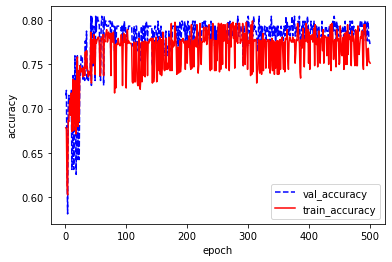

In [217]:
    list = [ x+1 for x in range(500) ] 
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(list, val_accuracy, 'blue', label='val_accuracy', linestyle = '--')
    plt.plot(list, train_accuracy, 'red', label='train_accuracy')
    plt.legend()
    plt.show()

<h3>Q9.위의 프로그램에 의해서 구해진 train_accuracy와 val_accuracy을 이용해서 아래와 같은 그래프를 그린다. </h3>

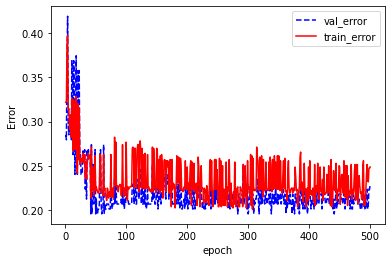

In [218]:
    val_error = [(1 - val_accuracy[i]) for i in range (len(train_accuracy))]
    train_error = [(1 - train_accuracy[i]) for i in range(len(train_accuracy))]
    plt.xlabel('epoch')
    plt.ylabel('Error')
    plt.plot(list, val_error , 'blue', label='val_error', linestyle = '--')
    plt.plot(list, train_error , 'red', label='train_error')

    plt.legend()
    plt.show()    